<a href="https://colab.research.google.com/github/abhisheksuman1986/InstrumentCluster/blob/main/YOLOv8ClusterObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Aug 10 12:38:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Installing Ultralytics Package

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 771, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'benchmark', 'predict', 'val', 'export', 'track', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'detect', 'obb', 'classify', 'pose'}
                MODE (required) is one of {'benchmark', 'predict', 'val', 'export', 'track', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Donloading Cluster dataset from Roboflow

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d1ZT5pzjC8kdwnIxgc7W")
project = rf.workspace("iconsside2").project("modelchoose")
version = project.version(1)
dataset = version.download("yolov8")
print(dataset.location)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`
/content/modelChoose-1


# Train YOLOv8 Model Cluster dataset downloaded from Roboflow

In [2]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data={dataset.location}/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

# Plotting Confusion Matrix

In [3]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

NameError: name 'Image' is not defined

# Plotting Results - Mean Average Precision

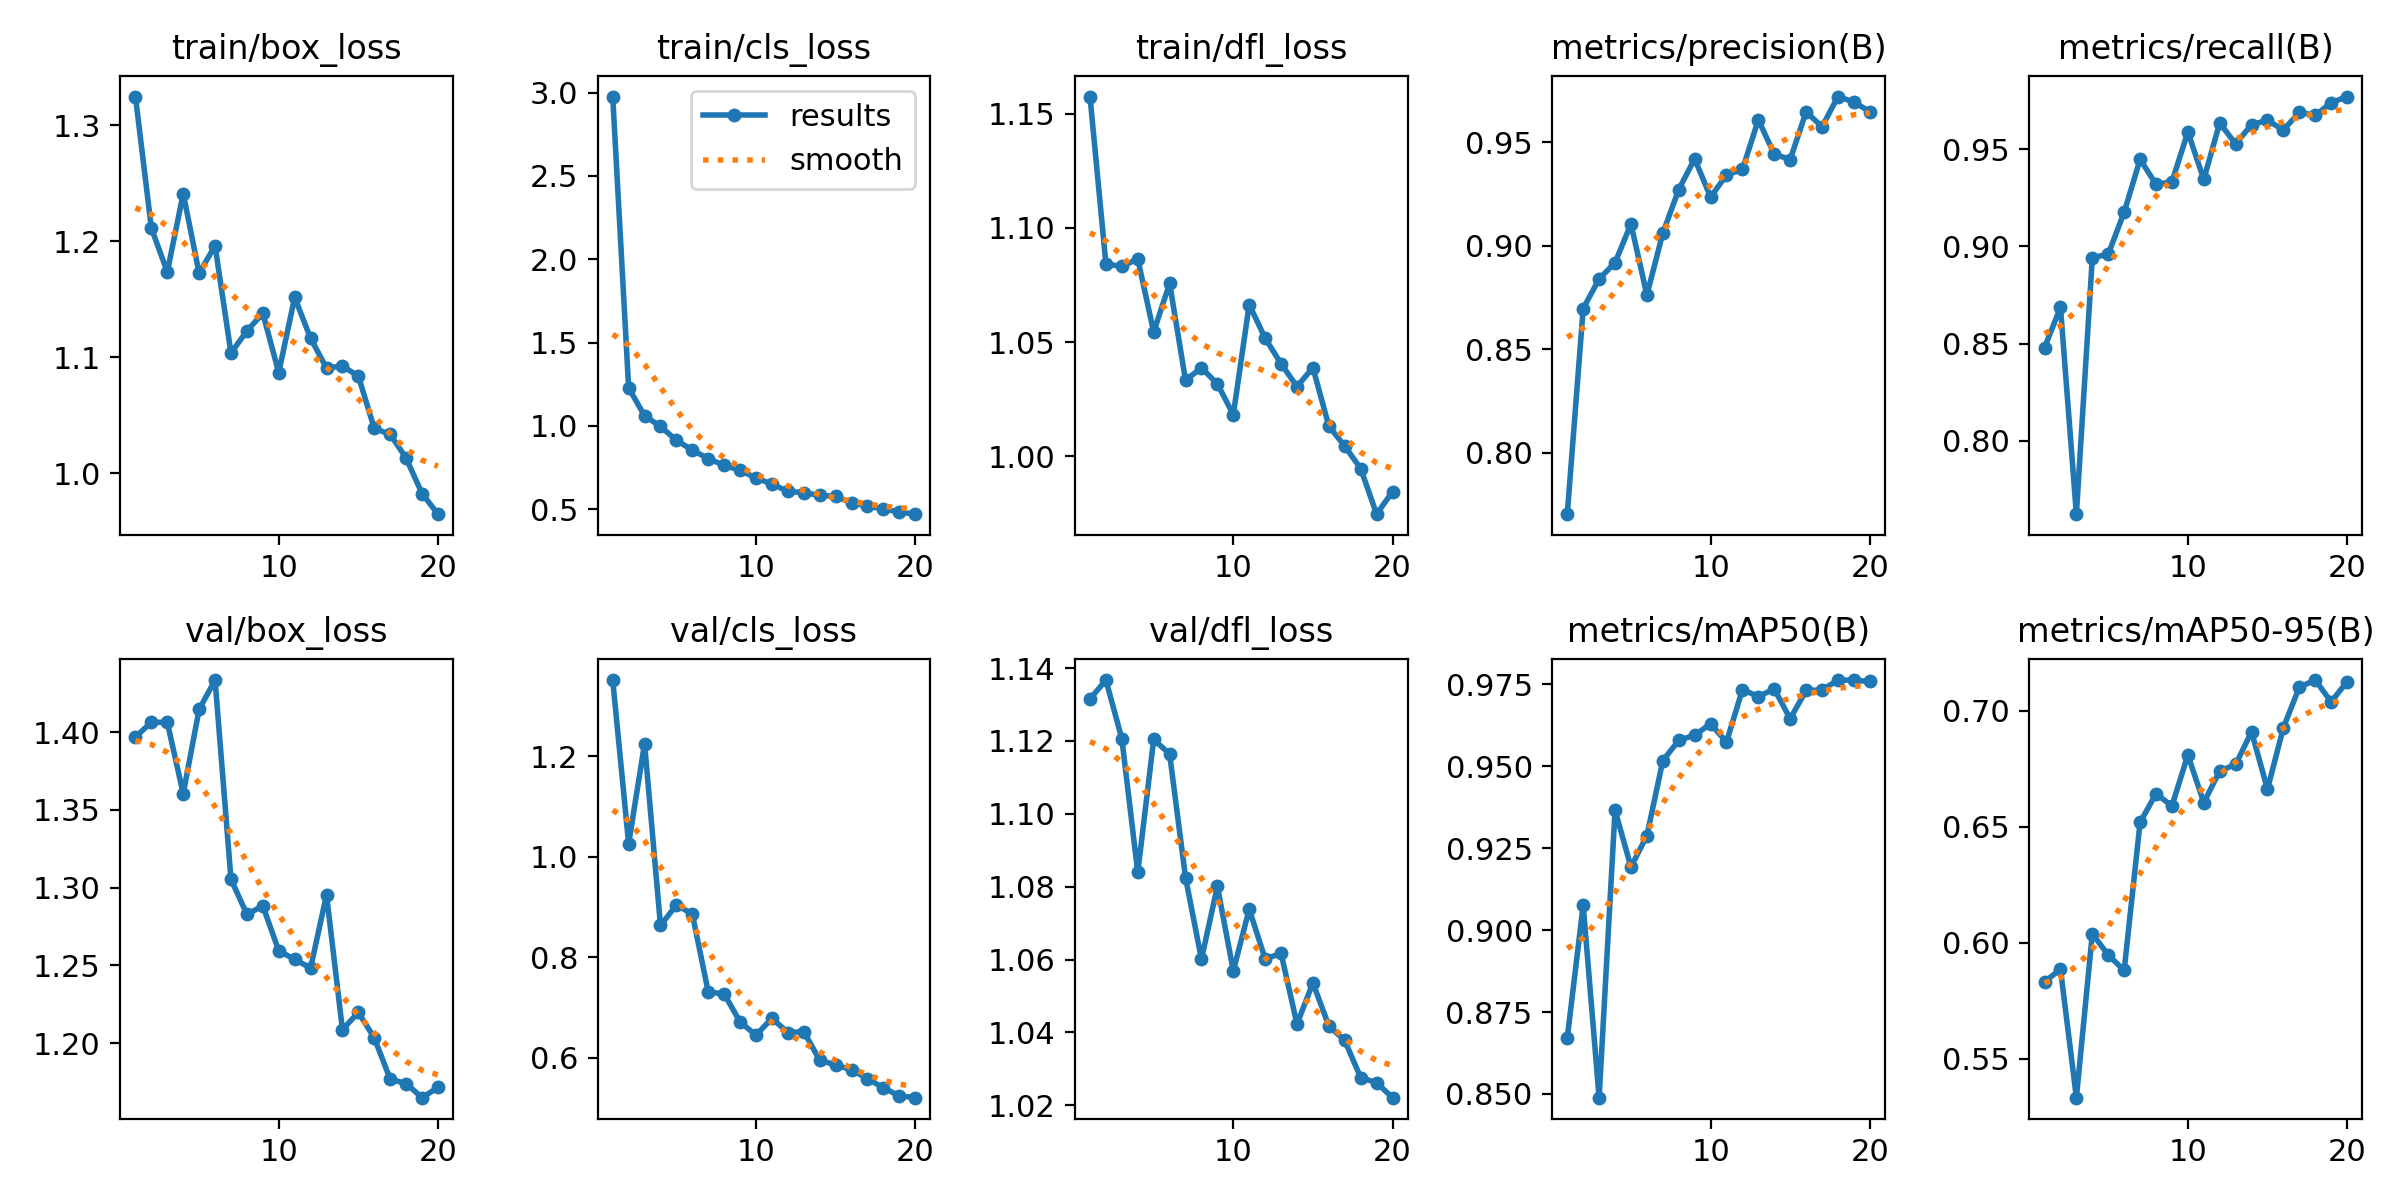

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

# After fine tuning on custom dataset Model is predicting object on Validation set

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/modelChoose-1/valid/labels.cache... 268 images, 0 backgrounds, 0 corrupt: 100% 268/268 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:04<00:00,  3.64it/s]
                   all        268        598      0.972      0.968      0.976      0.714
                     0         99         99          1       0.96      0.985      0.719
                     1         85         85      0.949      0.988      0.961      0.633
                     2         82         82      0.987          1      0.995      0.708
                     3         87         88      0.954      0.952      0.955      0.617
                     4         79         80      0.987      0.958      0.988      0.681
                     5        

# Prediction on Test images

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs

image 1/134 /content/modelChoose-1/test/images/49007068062_31d87e4476_b_jpeg_jpg.rf.310bf517a1e6e3e47ef798dea87b16e7.jpg: 640x640 2 4s, 11.2ms
image 2/134 /content/modelChoose-1/test/images/5750d567b0f07_jpeg_jpg.rf.fef3a036afb8a335b7ab8443f241b163.jpg: 640x640 (no detections), 10.0ms
image 3/134 /content/modelChoose-1/test/images/880cd603-c4b1-477e-872f-f238105abf59_jpeg_jpg.rf.3dc80db74cb02c077321b5c18ee21140.jpg: 640x640 1 1, 1 4, 1 9, 9.1ms
image 4/134 /content/modelChoose-1/test/images/BLOG-1_jpeg_jpg.rf.725d7dd459c78aaa10ef8f02d93adf81.jpg: 640x640 1 0, 1 1, 9.8ms
image 5/134 /content/modelChoose-1/test/images/BatteryLight-58ebec213df78c5162b9d68a_png_jpg.rf.ea3fe4a566973d6d1b108759803bc95b.jpg: 640x640 1 0, 9.5ms
image 6/134 /content/modelChoose-1/test/images/Brown_1_rot_0px_png_jpg.rf.cb845c67ce43

# Predicition Results shown below

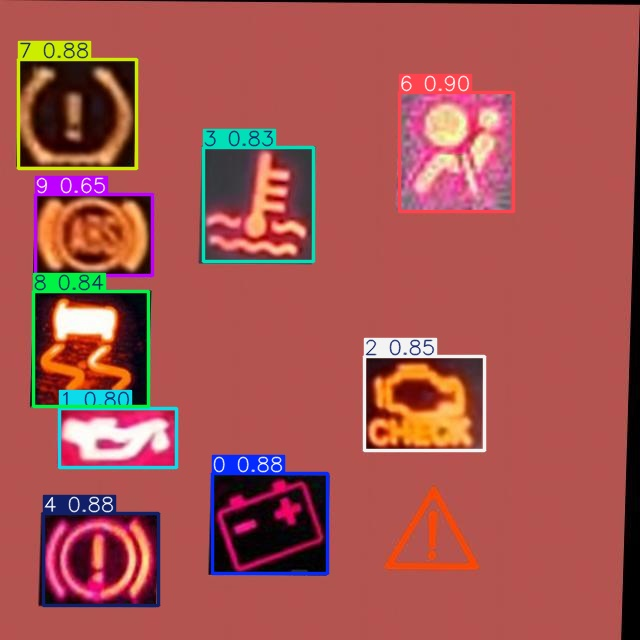

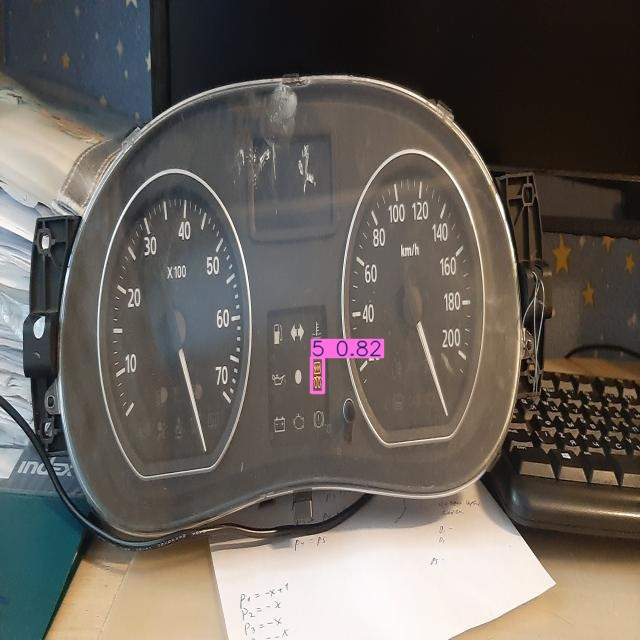

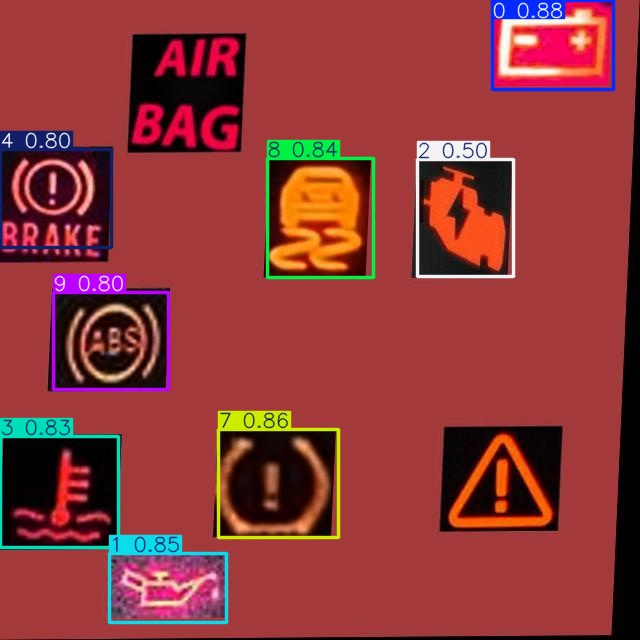

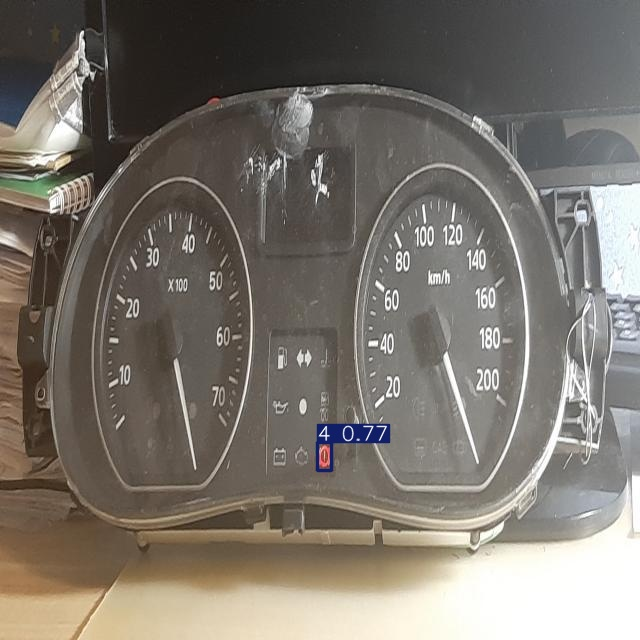

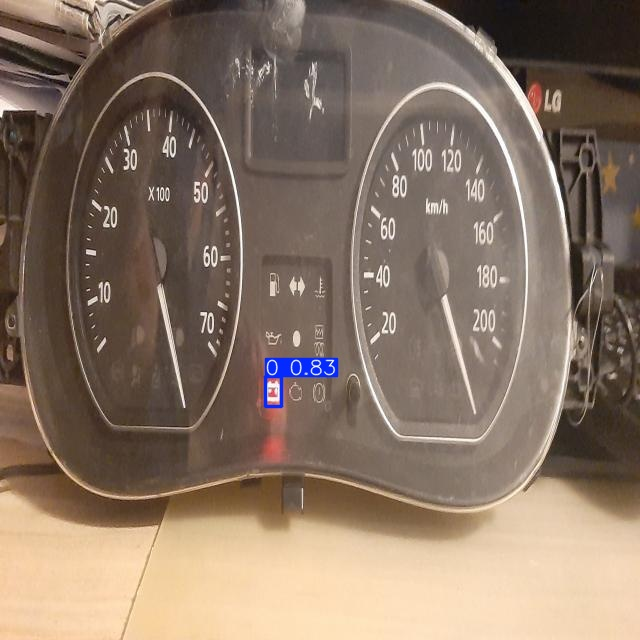

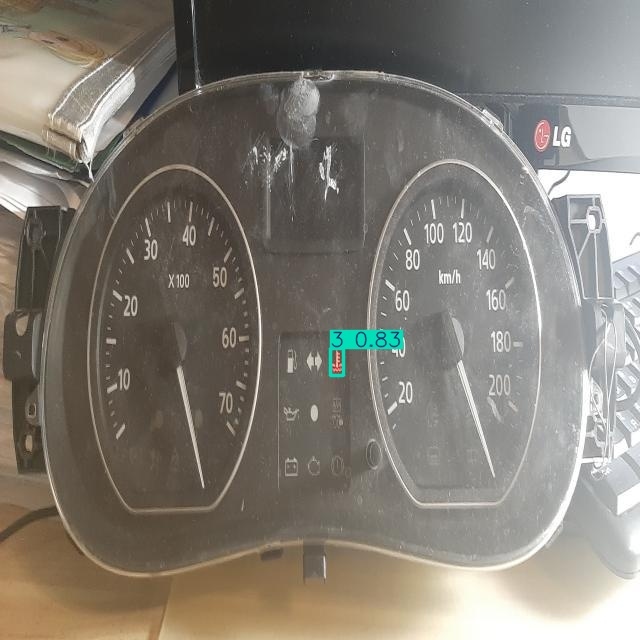

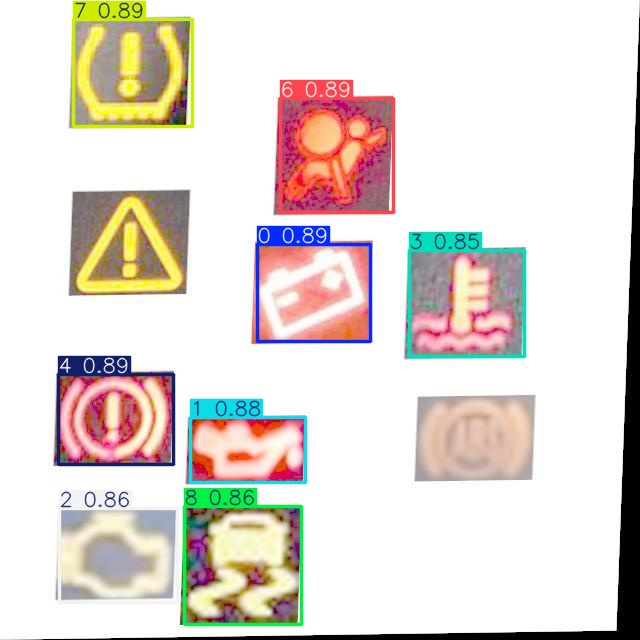

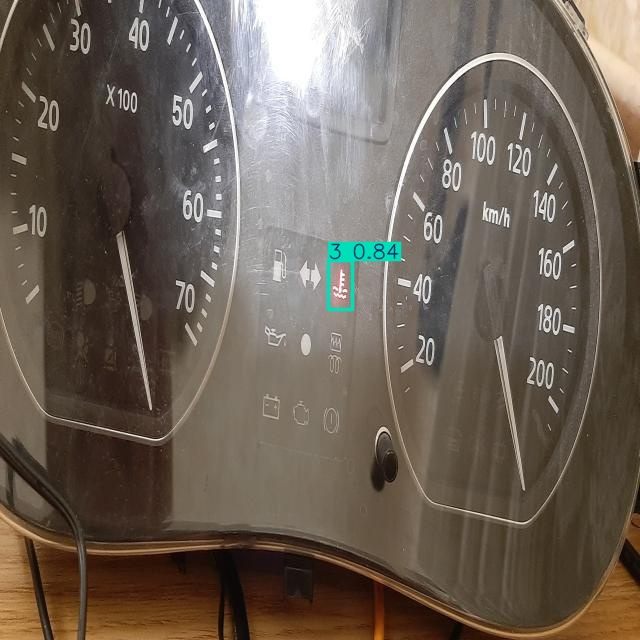

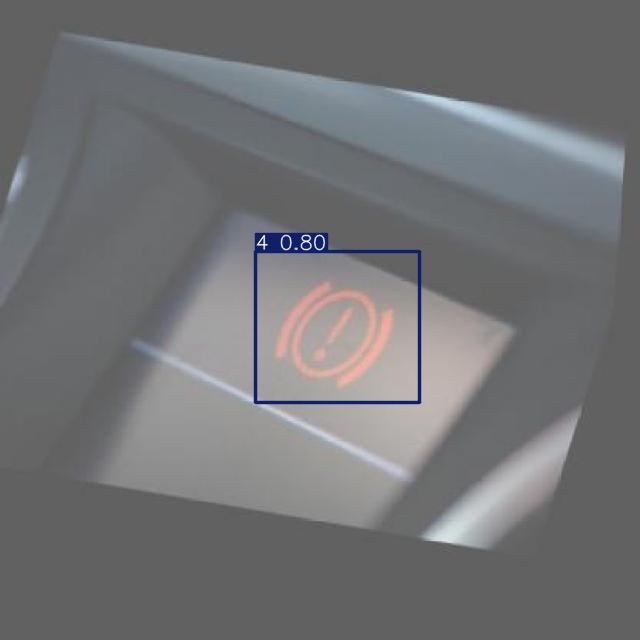

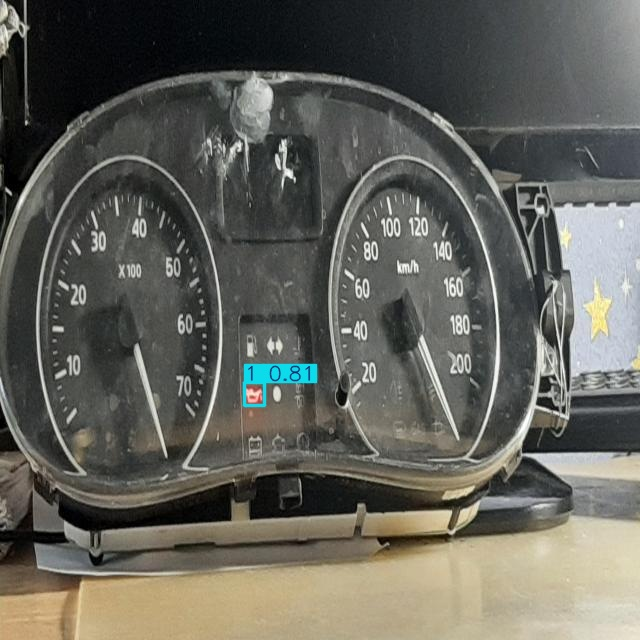

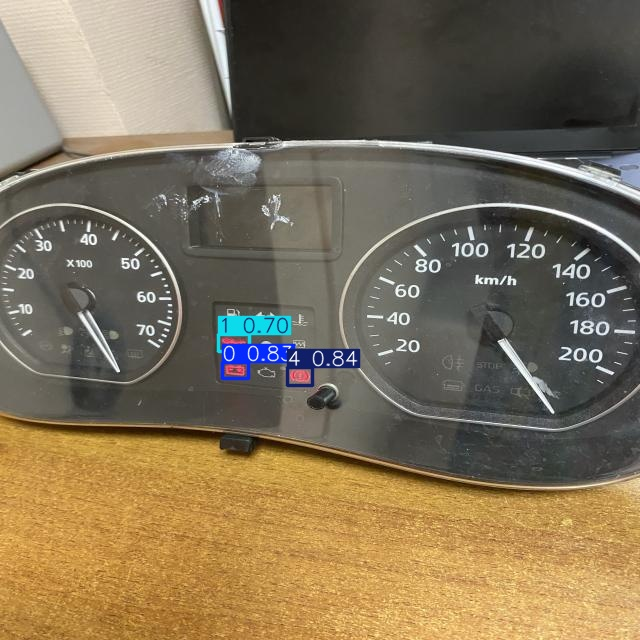

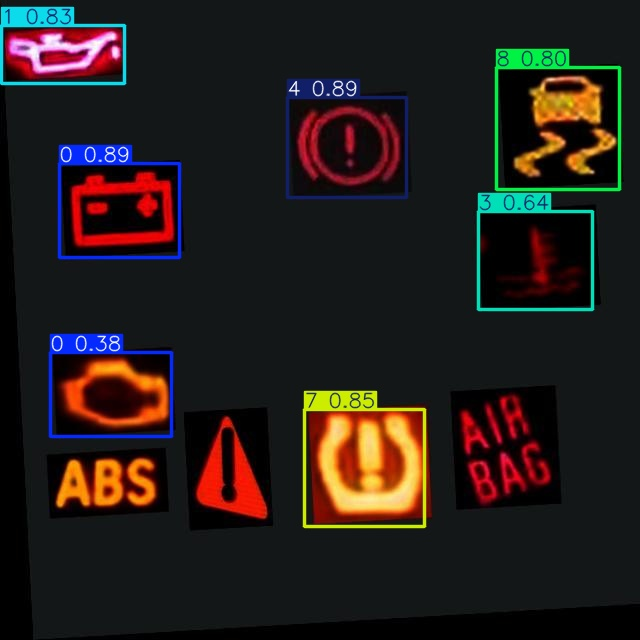

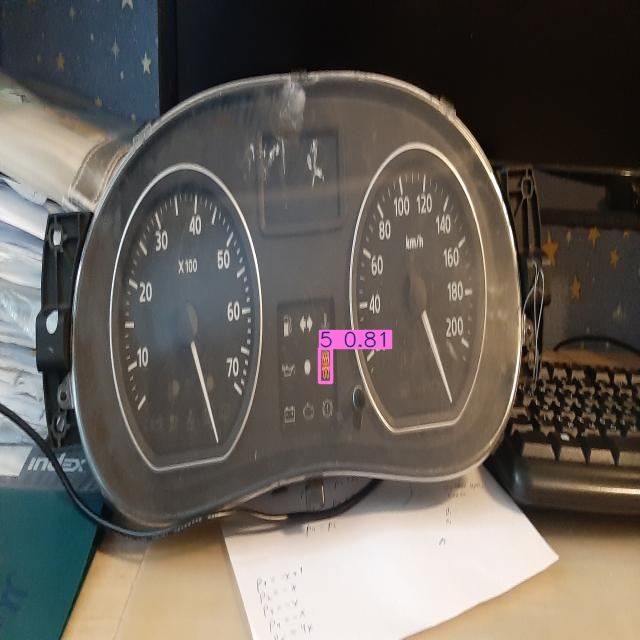

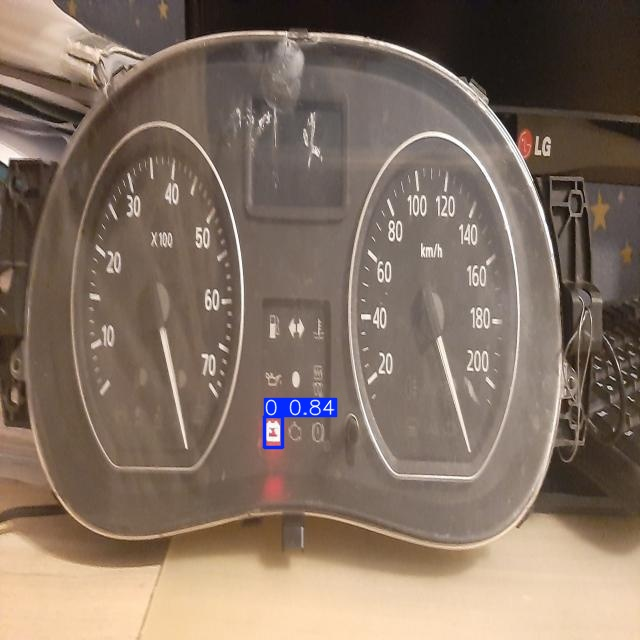

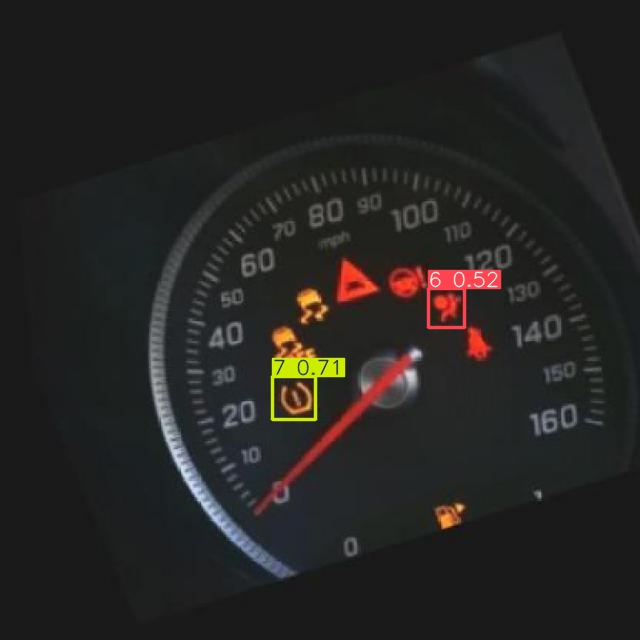

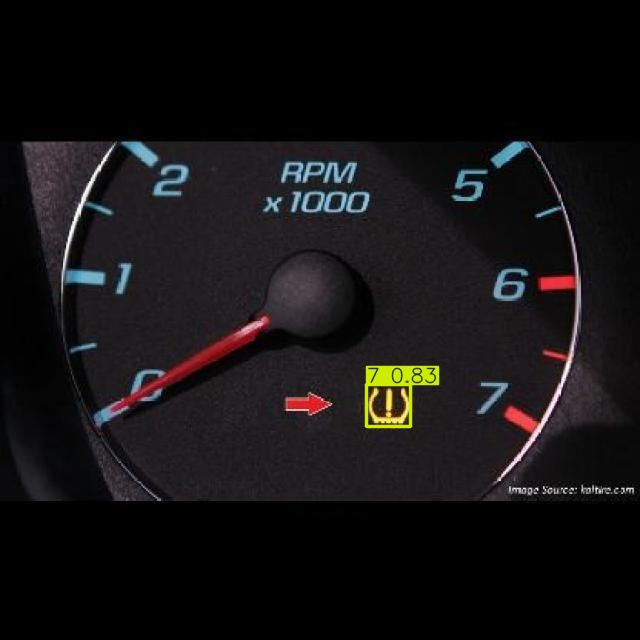

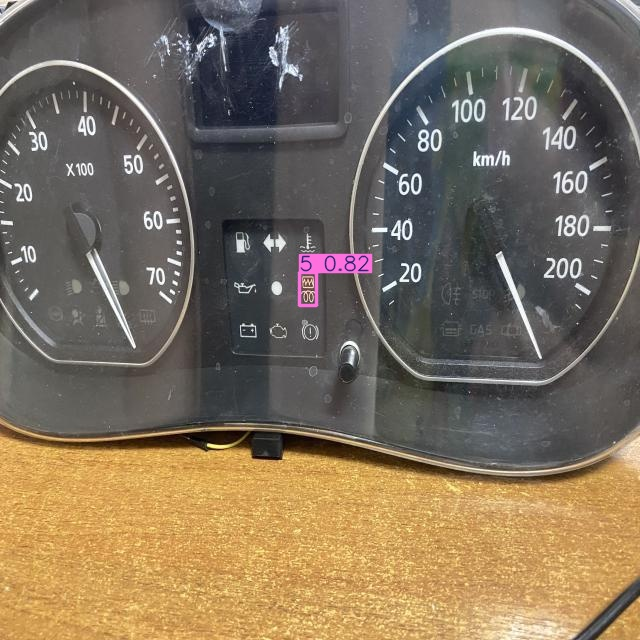

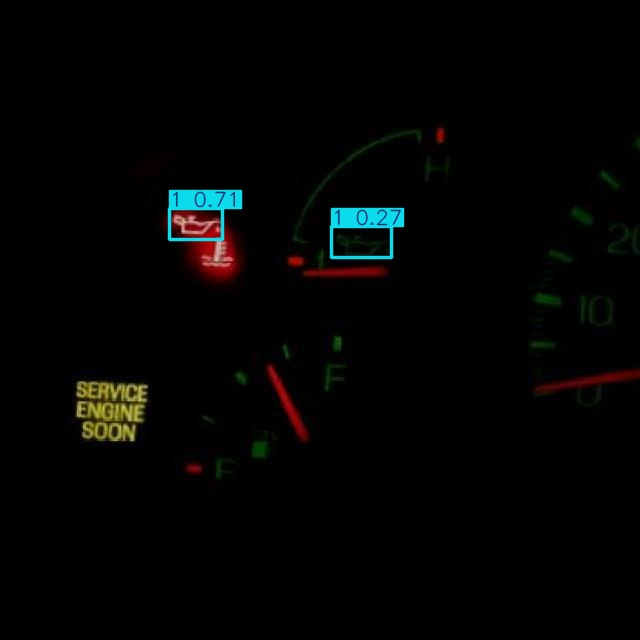

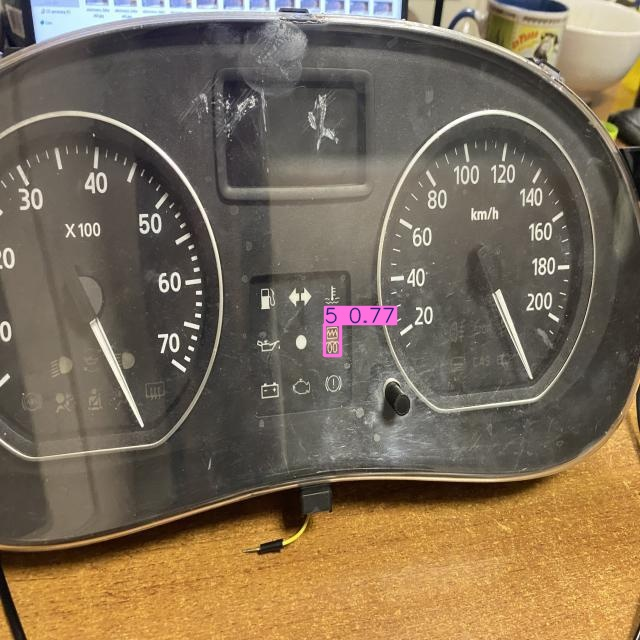

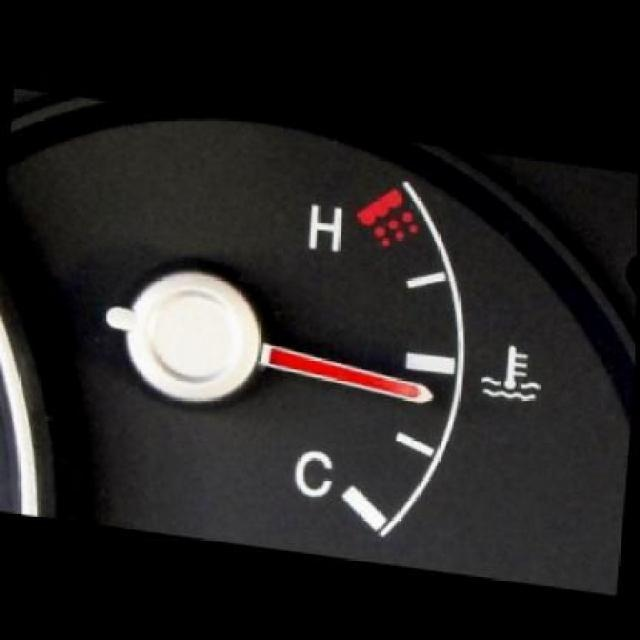

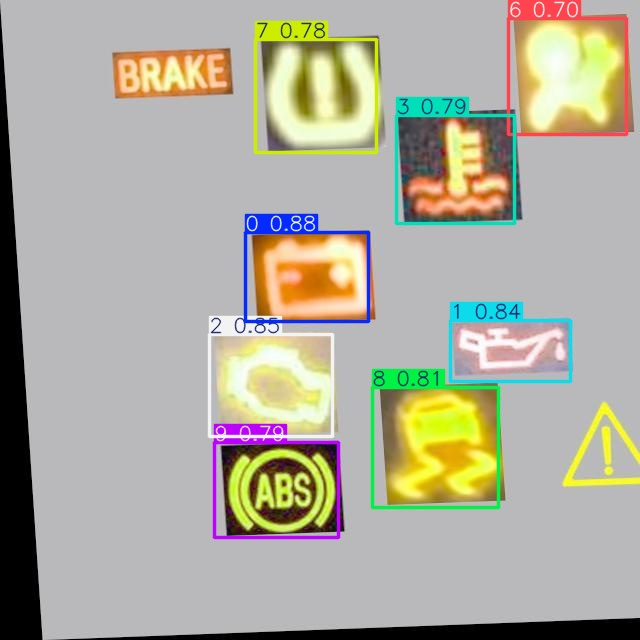

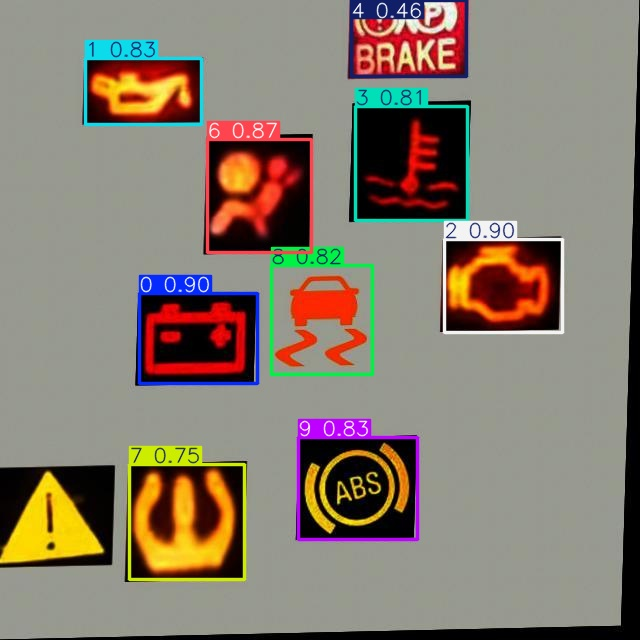

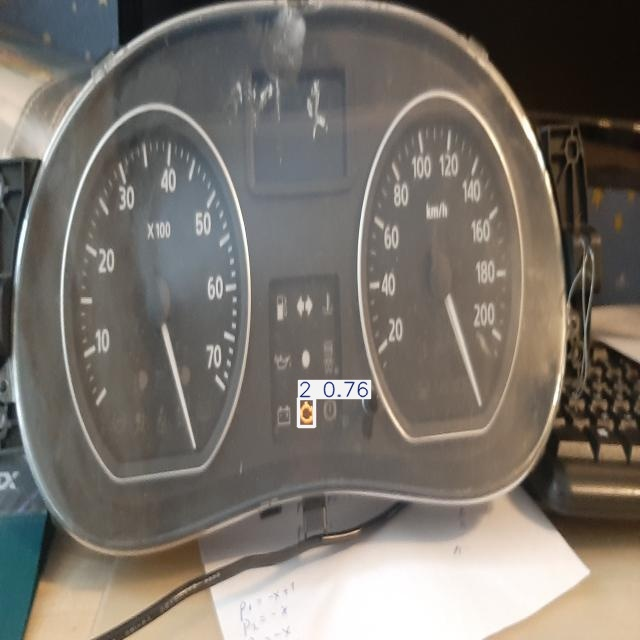

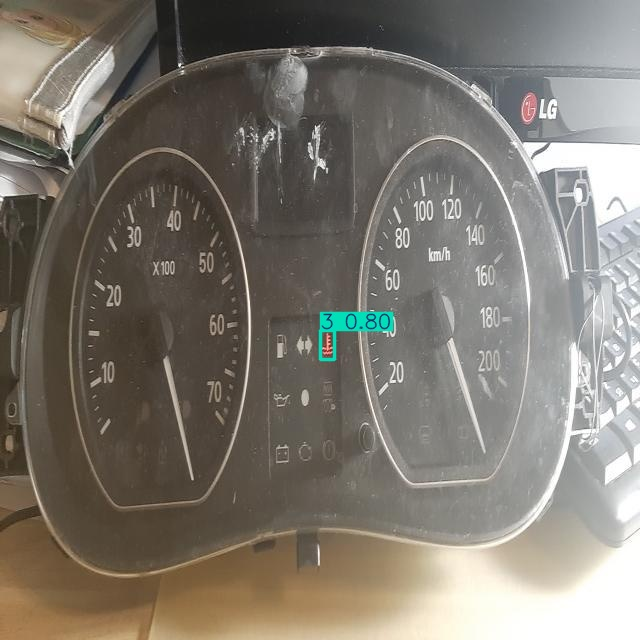

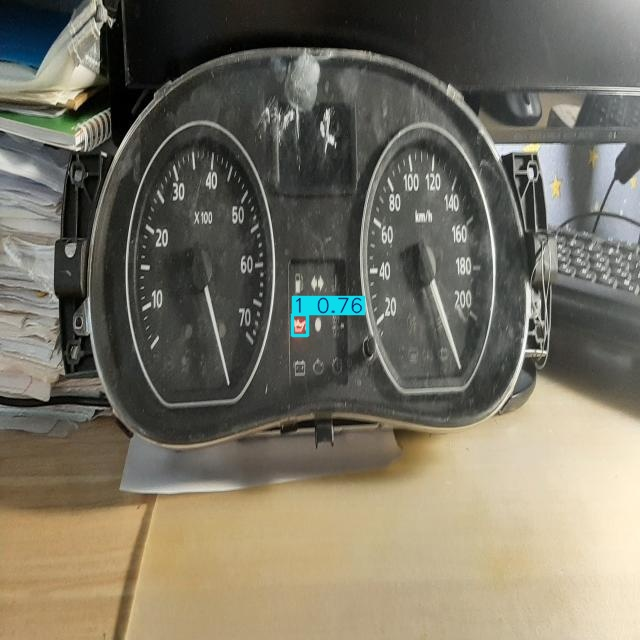

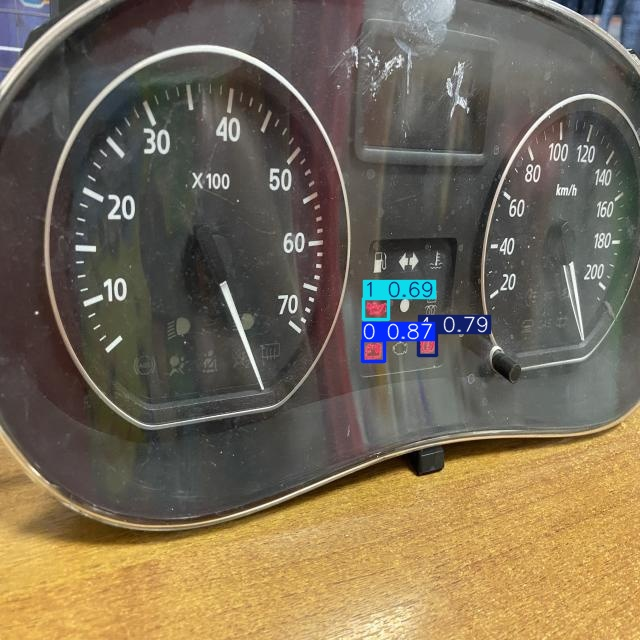

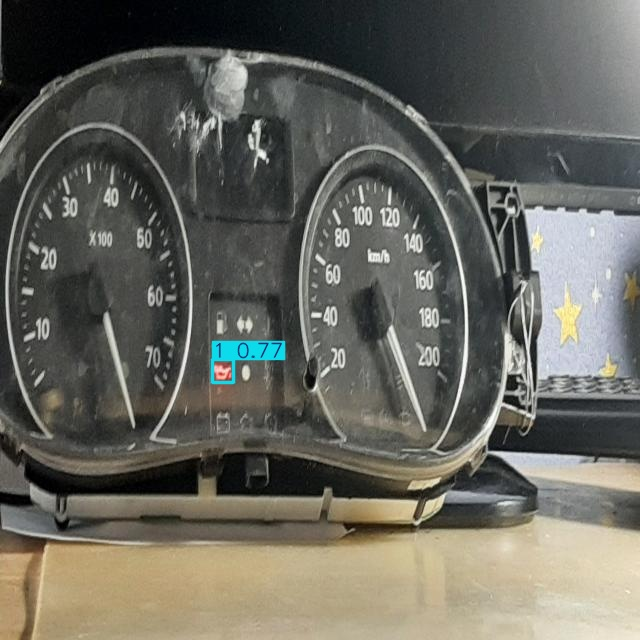

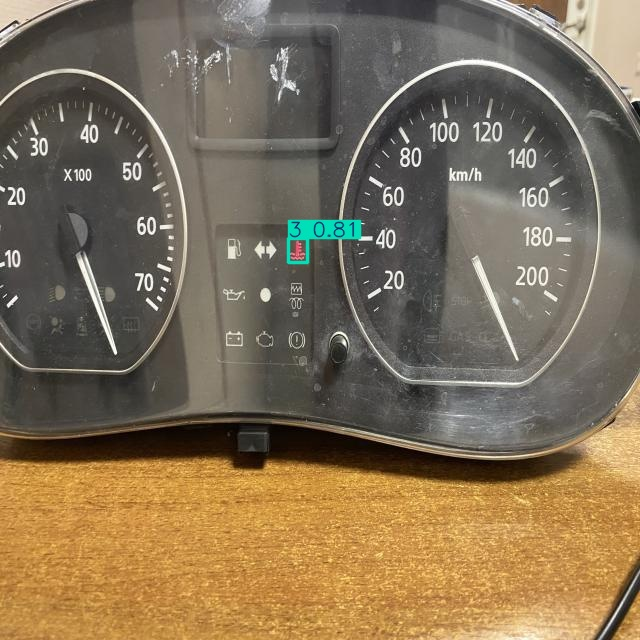

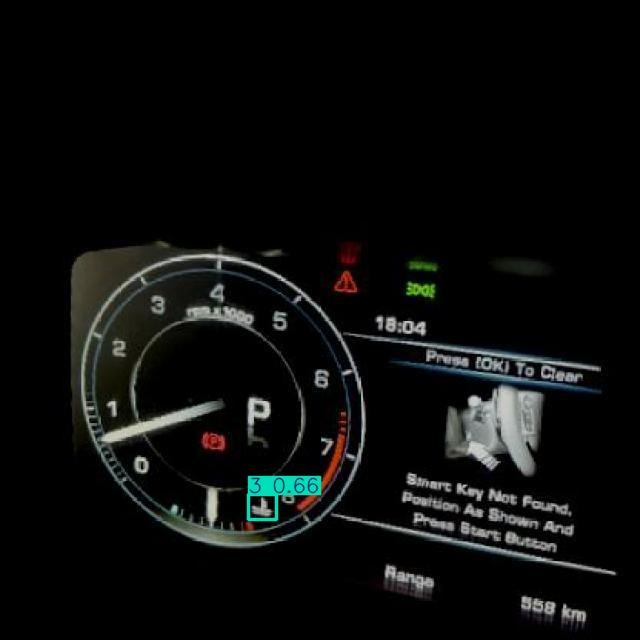

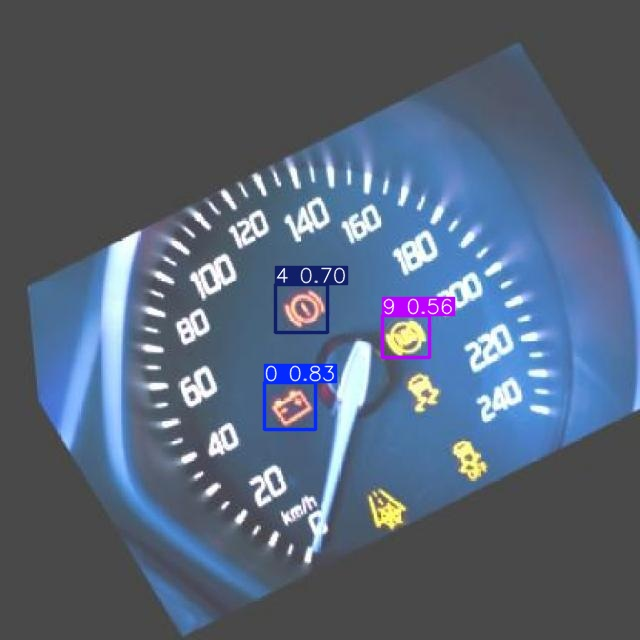

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:30]:
    display(Image(filename=image_path, width=600))
    print("\n")

# Fine Tuning Model on TATA NEXON CLUSTER DATA

## Mount Google Drive to Download Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!touch /content/drive/MyDrive/Dataset/Cluster_Tata_Nexon/data.yaml

In [6]:
# Train
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/Dataset/Cluster_Tata_Nexon/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Dataset/Cluster_Tata_Nexon/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_